## This is the notebook of SEIR models specific looking at COVID-19 scenarios
### SEIR model

The SEIR model is the extended version of basic SIR model by adding another population portion showing the individuals who have been exposed to the virus but have not infected yet.

The diagram is shown as:
$$\text{Susceptible} (S)
\xrightarrow{\frac{\beta S I}{N}} 
\text{Exposed} (E)
\xrightarrow{\alpha E} 
\text{Infectious} (I)
\xrightarrow{\gamma I} 
\text{Recovered} (R) $$

The equation of the deterministic SEIR model is shown below:

\begin{align*}
\frac{ds}{dt} & = -\beta s i \\
\frac{de}{dt} & = \beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

where $s + e + i + r = 1$.


In [1]:
import numpy as np
from epidemic_models.MSEIR import seirSim
from epidemic_models.MSEIR import plot_trajectory
from epidemic_models.MSEIR import sirSim
import matplotlib.pyplot as plt

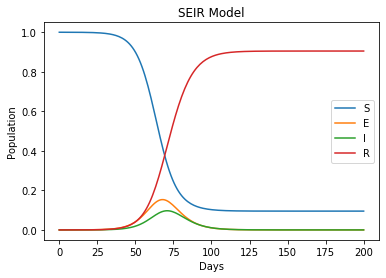

In [13]:
# initial conditions
# parameter values
R0 = 2.6 # basic reproduction number for covid - how infective the disease is 
# Based on CDC, the median incubation time for COVID-19 is about 4-5 days 
incubation = 5
infective = 3.3 # infectious periods

# initial number of infected and recovered individuals as fractions
N = 20000
e0 = 1/N
i0 = 0.00
r0 = 0.00
s0 = 1 - e0 - i0 - r0
y0 = np.array([s0, e0, i0, r0])

alpha = 1/incubation
gamma = 1/infective
beta = R0*gamma
t=np.linspace(0, 200, 200)

seir_result = seirSim(y0, beta, alpha, gamma, t, showPlot=True)

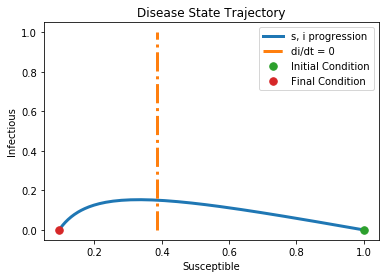

In [9]:
# plot disease progression trajectory
s, e, i, r = seir_result.T
plot_trajectory(t, R0, s, i, e)

## Compare with SIR model

SIR model:
$${ \frac{dS}{dt} = -\frac{a}{N} I S \\ \frac{dI}{dt} = \frac{a}{N} I S - b I \\ \frac{dR}{dt} = b I}$$

Adjust model parameters to look at population fractions rather than raw population counts to make it more comparable.
Let:
$${s = S/N,  \\ i = I/N,  \\ r=R/N}$$

so the model eqation for the new parameter is:
$${ \frac{ds}{dt} = -{\alpha} i s,  \\ \frac{dI}{dt} = \alpha i s - \beta i,  \\ \frac{dR}{dt} = \beta i}$$


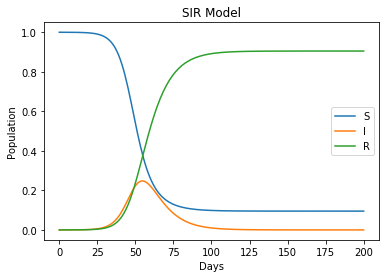

In [10]:
## SIR model for the same paramerters
# initial number of infected and recovered individuals
beta_1 = 1/8.4
alpha_1 = R0 * beta_1

i0_sir = 1/N
r0_sir = 0.00
s0_sir = 1 - i0_sir - r0_sir
y0_sir = np.array([s0_sir, i0_sir, r0_sir])

sir_result = sirSim(y0_sir, t, alpha_1, beta_1, showPlot=True)

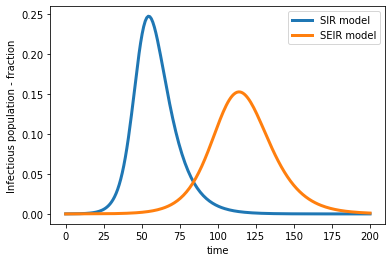

In [11]:
s_sir, i_sir, r_sir = sir_result.T
s, e, i, r = seir_result.T

plt.plot(t, i_sir, lw=3, label= "SIR model")
plt.plot(t, i, lw=3, label= "SEIR model")
plt.xlabel('time')
plt.ylabel('Infectious population - fraction')
plt.legend()

## Compare disease trajetories with different covid variants - SEIR model

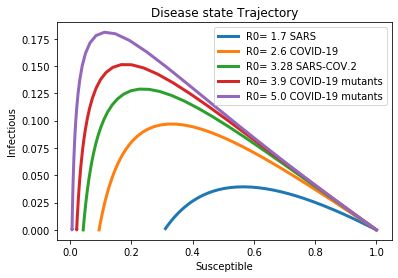

In [14]:
R0s = np.array([1.7, 2.6, 3.28, 3.9, 5])
annots = ["SARS", "COVID-19", "SARS-COV.2", "COVID-19 mutants", "COVID-19 mutants"]
j = 0

results = list()
for it in R0s:
    beta = it*gamma
    result = seirSim(y0, beta, alpha, gamma, t, showPlot=False)
    results.append(result)
    
    s_t, e_t, i_t, r_t = result.T
    plt.plot(s_t, i_t, lw=3, label= "R0= " + str(it) + " " + annots[j])
    j = j+1
    
plt.title('Disease state Trajectory')
plt.xlabel('Susceptible')
plt.ylabel('Infectious')
plt.legend()

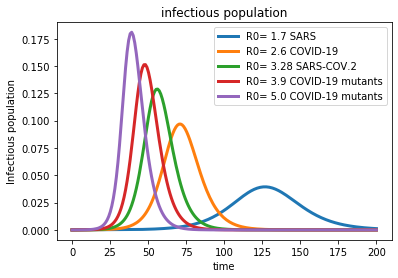

In [15]:
# infectious population
j = 0
for i in range(len(results)):
    s_t, e_t, i_t, r_t = results[i].T
    plt.plot(t, i_t, lw=3, label= "R0= " + str(R0s[j]) + " " + annots[j])
    j = j+1

plt.title('infectious population')
plt.xlabel('time')
plt.ylabel('Infectious population')
plt.legend()

## How social distancing affect disease spread

To model the effect of social distance of controlling disease spread, we introduced a control parameter c to the SEIR model, indicating the fraction of transmittions are prevented.  

c=0 correspondent to no controls and c=1 correspond to the perfect control that isolated every infected individual or extreamly long distance among people that totally prevent disease transmission. 

The fomular of SEIR model is become the following:

$$\text{Susceptible} (S)
\xrightarrow{(1-c)*\frac{\beta S I}{N}} 
\text{Exposed} (E)
\xrightarrow{\alpha E} 
\text{Infectious} (I)
\xrightarrow{\gamma I} 
\text{Recovered} (R) $$


\begin{align*}
\frac{ds}{dt} & = -(1-c)\beta s i \\
\frac{de}{dt} & = (1-c)\beta s i - \alpha e \\
\frac{di}{dt} & = \alpha e  - \gamma i \\
\frac{dr}{dt} & = \gamma i
\end{align*} 

The basic strategy for social distancing is to slow transmission so that we can:
* Reduce the number of infectious population
* Slow down the progress of any outbreak long enough until vaccine comes up.

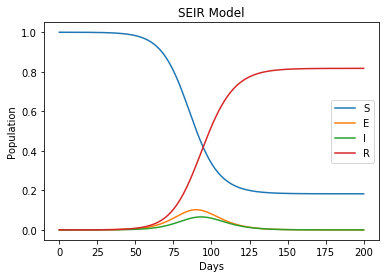

In [16]:
c = 0.2
R0 = 2.6
beta = R0*gamma

seir_result_control = seirSim(y0, beta, alpha, gamma, t, c=c, showPlot=True)

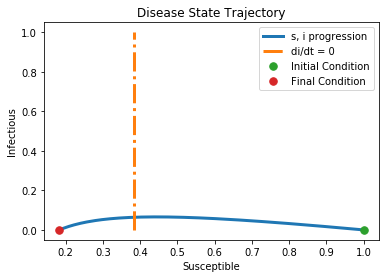

In [17]:
# plot progression trajetory
s, e, i, r = seir_result_control.T
plot_trajectory(t, R0, s, i, e)

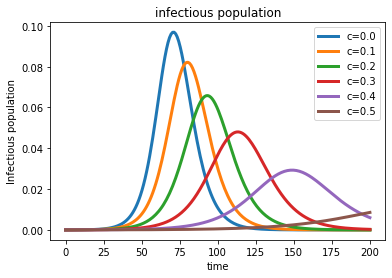

In [18]:
# compare with different control cases
cs = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])
results = list()

for i in range(len(cs)):
    result = seirSim(y0, beta, alpha, gamma, t, c=cs[i], showPlot=False)
    results.append(result)
    
    s_t, e_t, i_t, r_t = result.T
    plt.plot(t, i_t, lw=3, label= "c=" + str(cs[i]))
    
plt.title('infectious population')
plt.xlabel('time')
plt.ylabel('Infectious population')
plt.legend()

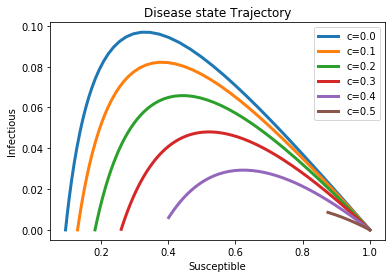

In [19]:
for i in range(len(results)):
    s_t, e_t, i_t, r_t = results[i].T
    plt.plot(s_t, i_t, lw=3, label= "c=" + str(cs[i]))
    
plt.title('Disease state Trajectory')
plt.xlabel('Susceptible')
plt.ylabel('Infectious')
plt.legend()

### dynamic SEIR control model

The model we described above uses static c, but in reality, we may increase the control if we find the current control is not good enough or we would like to estimate epidemic statics in a global region contains serveral locations whose distance is gradually increase from disease center. For these scenarios, we also implemented a dynamic control model that gradually increase control paramter c from a small value until a saturation point.

$$\text{Susceptible} (S)
\xrightarrow{(1-c(t))*\frac{\beta S I}{N}} 
\text{Exposed} (E)
\xrightarrow{\alpha E} 
\text{Infectious} (I)
\xrightarrow{\gamma I} 
\text{Recovered} (R) $$

In [20]:
# plot change of c
tscale = 100
cmax = 0.3
c_value = list()

for index in range(len(t)):
    sl = cmax/tscale
    c_value.append(min(cmax, sl * t[index]))


Text(0, 0.5, 'control parameter')

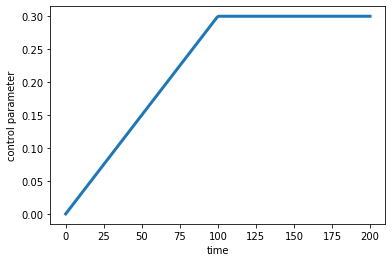

In [21]:
plt.plot(t, c_value, lw=3)

plt.xlabel('time')
plt.ylabel('control parameter')


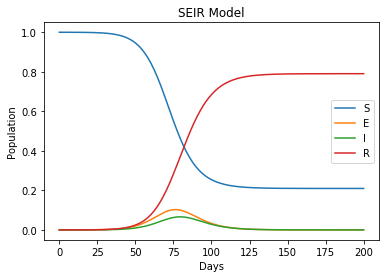

In [22]:
cmax = 0.3
tscale = 100
result_dynamic = seirSim(y0, beta, alpha, gamma, t, c=0.02, showPlot=True, cmax=cmax, tstar=tscale, dynamic=True)

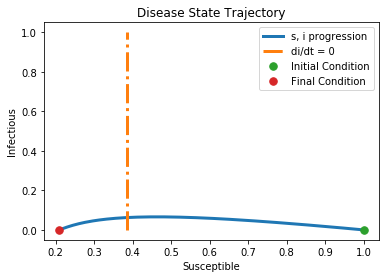

In [23]:
# plot progression trajetory
s, e, i, r = result_dynamic.T
plot_trajectory(t, R0, s, i, e)

### compare with static model

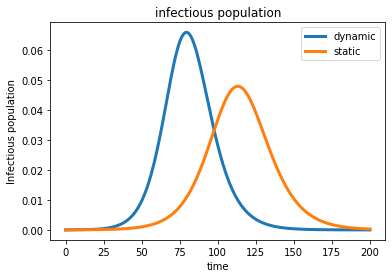

In [24]:
result_static = seirSim(y0, beta, alpha, gamma, t, c=cmax, showPlot=False)

plt.plot(t, result_dynamic.T[2, :], lw=3, label= "dynamic")
plt.plot(t, result_static.T[2, :], lw=3, label= "static")

plt.title('infectious population')
plt.xlabel('time')
plt.ylabel('Infectious population')
plt.legend()